<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#The-Monty-Hall-Problem---Brute-Force-Test" data-toc-modified-id="The-Monty-Hall-Problem---Brute-Force-Test-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>The Monty Hall Problem - Brute Force Test</a></span><ul class="toc-item"><li><span><a href="#The-Game:" data-toc-modified-id="The-Game:-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>The Game:</a></span><ul class="toc-item"><li><span><a href="#Test-Problem" data-toc-modified-id="Test-Problem-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Test Problem</a></span></li></ul></li><li><span><a href="#The-Game-Show" data-toc-modified-id="The-Game-Show-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>The Game Show</a></span></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

# The Monty Hall Problem - Brute Force Test

## The Game:

__Suppose you are on a game show and are asked to pick one of three doors. Behind one door is a car; behind the others, goats.  
You pick a door, say No. 1, and the host, who knows what's behind the doors, opens another door, say No. 3, which has a goat.__  

__He then says to you, "Do you want to switch your pick to door No. 2?"__   
  
__Is it to your advantage to switch your choice?__

The given probabilities depend on specific assumptions about how the host and contestant choose their doors. A key insight is that, under these standard conditions, there is more information about doors 2 and 3 than was available at the beginning of the game when door 1 was chosen by the player: the host's deliberate action adds value to the door he did not choose to eliminate, but not to the one chosen by the contestant originally.  

Another insight is that switching doors is a different action than choosing between the two remaining doors at random, as the first action uses the previous information and the latter does not. Other possible behaviors than the one described can reveal different additional information, or none at all, and yield different probabilities.  

Yet another insight is that your chance of winning by switching doors is directly related to your chance of choosing the winning door in the first place: if you choose the correct door on your first try, then switching loses; if you choose a wrong door on your first try, then switching wins; your chance of choosing the correct door on your first try is 1/3, and the chance of choosing a wrong door is 2/3.

### Test Problem
First we are going to graph the outcome of a random event that we know has a probability of 2/3, rolling a single die and getting any of the number from 1 to 4. The probability of rolling a 1 thru 4 is 4/6 = 2/3 or 2 out of 3.

__We are going to test this by running 500 simulations__

###### Our graph should settle at about 66%

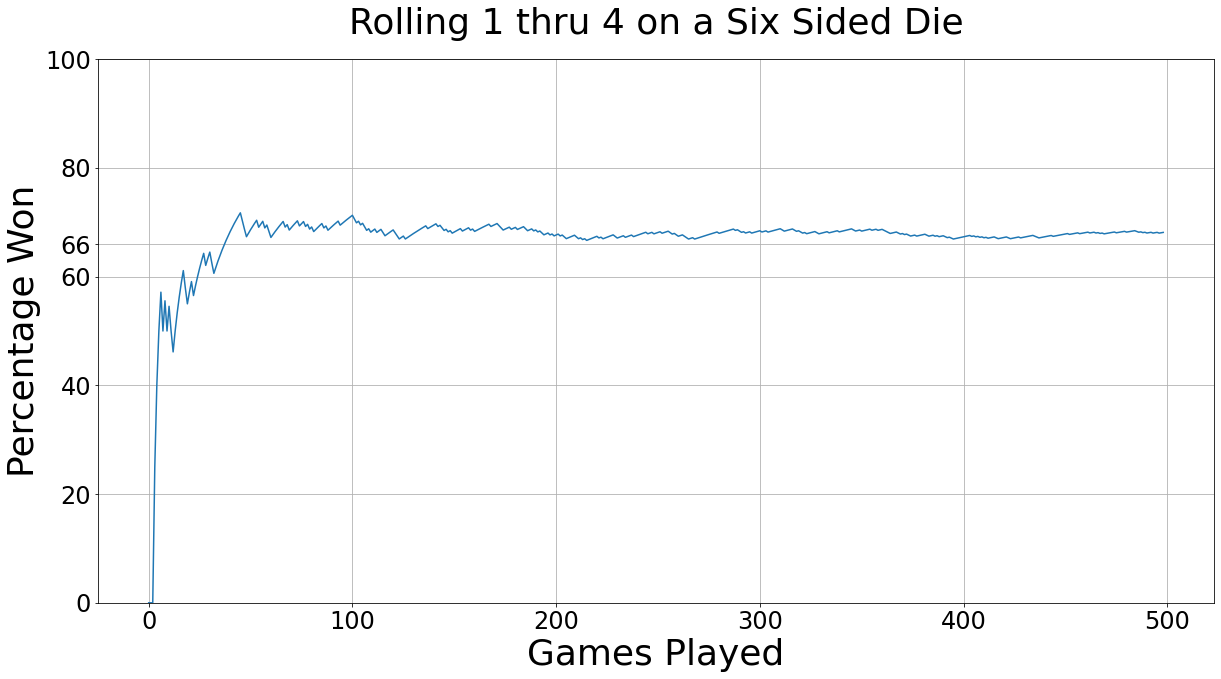

In [1]:
'''
Author: James W Harvey
© 2020
'''

# Import Libraries
import random
import matplotlib.pyplot as plt
import matplotlib.artist as art
import numpy as np

games_won = 0                      # We start with 0 games won.
avg_won = []                       # A list to store our averages to graph.
                                    
for games in range(1, 500):        # Run the game 500 times
    roll = random.randint(1,6)     # Generate a random number between 1 and 6 inclusive.
    if roll >=1 and roll <=4:      # If the number is between 1 and 4 inclusive, you win.
        games_won += 1             # Increment the number of games won by 1.
    try:                           # Try statement avoids a divide by 0 error.
        average = games_won/games  # Calculate our average based on games won divided by games played.
    except:
        pass
    avg_won.append(average)        # Append our new average to our list.

                                   # Format our output Graph
plt.figure(figsize=(20,10))
plt.title('Rolling 1 thru 4 on a Six Sided Die', fontsize=36, pad=25.0)
plt.xlabel('Games Played', fontsize=36)
plt.xticks(fontsize=24)
plt.grid()
plt.ylabel('Percentage Won', fontsize=36)
plt.ylim(0,1)
positions = (0, .2, .4, .6, .66, .8, 1)
labels = ('0', '20', '40', '60', '66', '80', '100')
plt.yticks(positions, labels, fontsize=24)
art.Artist.set_animated


plt.plot(avg_won)
plt.show()                        # Display the Graph

## The Game Show

Now we are going to do the same type of test with the Monty Hall Problem.

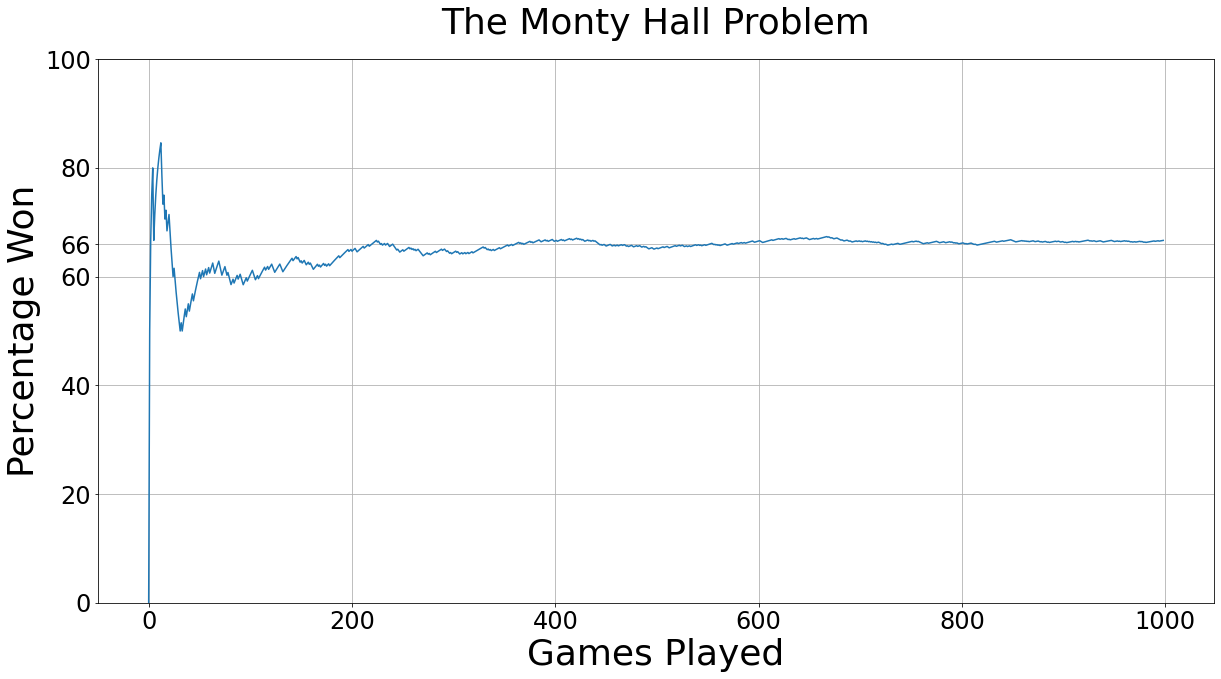

In [2]:
import random
import matplotlib.pyplot as plt
import numpy as np

test = 1000
wins = 0
success = []

for games in range(1, test):
    the_goats = []                         # An empty list to hold the goats
    the_doors = [1, 2, 3]                  # The three doors
    the_car = random.randint(1,3)          # The door with the car
    the_choice = random.randint(1,3)       # The first door choosen
    the_goats = the_doors.copy()           # Remove the car 
    the_goats.remove(the_car)              # and all that remains are goats
    
    if the_goats.count(the_choice) > 0:    # The goat door can't 
        the_goats.remove(the_choice)       # be equal to the choice door
    
    if len(the_goats) > 1:
        the_reveal = the_goats[random.randint(0, 1)]  # Reveal a goat
    else:
        the_reveal = the_goats[0]
        
    the_remaining = the_doors.copy()       # Figure out which doors remain
    the_remaining.remove(the_reveal)       # Remove the revealed door
    the_switch = the_remaining.copy()      # Switch the doors
    the_switch.remove(the_choice)          # Remove the choosen door
    if the_car == the_switch[0]:           # If the car is behind the switch door, 
        wins += 1                          # you win!
    
    success.append(wins/games)             # Calculate the average
    
                                           # Format the graph for output
plt.figure(figsize=(20,10))
plt.title('The Monty Hall Problem', fontsize=36, pad=25)
plt.xlabel('Games Played', fontsize=36)
plt.xticks(fontsize=24)
plt.grid()
plt.ylabel('Percentage Won', fontsize=36)
plt.ylim(0,1)
positions = (0, .2, .4, .6, .66, .8, 1)
labels = ('0', '20', '40', '60', '66', '80', '100')
plt.yticks(positions, labels, fontsize=24)
art.Artist.set_animated
plt.plot(success)
plt.show()

# Conclusion

As predicted, given a large enough sample set, the average of the games won settled just around 66%, confirming the hypothosis that switching doors increases your chances of winning form 33% to 66%.